# Dynamical Mode Decomposition (DMD)

In this notebook we tried to estimate linear system which governs the process, in the network case we are estimating the adjacency matix. We used Dynamical Mode Decomposition algorithm which was firstly described by P. Schimd [3] and extended for linear system with control by S. Brunton [1, 2]. 

## DMD for linear system

Let consider an unforced linear system stated as follows (1):
$$x_{k+1} = A x_k = A (A x_{k-1}) = A^3x_{k-2} = ... = A^{k}x_{0}\tag{1}$$
Therefore, we can define $X$ and $X'$ which record the evolution of the linear system.  
$X = \begin{bmatrix}
    \vert & \vert &  & \vert \\
    x_1 & x_2 & ... & x_{m-1} \\
    \vert & \vert &  & \vert
\end{bmatrix}; X' = \begin{bmatrix}
    \vert & \vert &  & \vert \\
    x_2 & x_3 & ... & x_{m  } \\
    \vert & \vert &  & \vert
\end{bmatrix}$  
where $m$ is the number of snapshots of the linear system. Knowing that the $X'$ is one time step shifted forward, we can substitute $X$ and $X'$ into (1)  
$X' = AX \tag{2}$  

We can find $A$ simply by mulitiplying equation (2) with $X^{\dagger}$, where $\dagger$ is the Moore-Penrose pseudoinverse of matrix $X$.  
$A = X'X^{\dagger} \tag{3}$  

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Let's consider a simple 4-cycle directed network with a initial state $x_0=[1,2,3,4]$ and observe how it is envolving for 10 time steps.

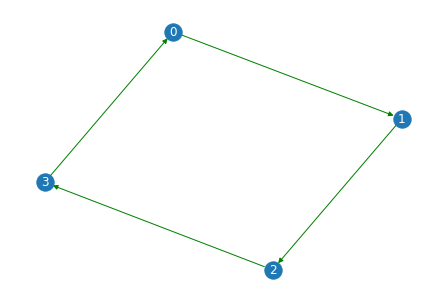

In [2]:
n = 4
G = nx.DiGraph()
G.add_edges_from([(i, (i + 1) % n) for i in range(n)])

nx.draw(G, with_labels=True, font_color="white", edge_color="g")
plt.show()

A = np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
B = np.array([[1], [0], [0], [0]])

Now, we are going to reverse engineering the linear process which generated the snapshot $X$ and $X'$.

In [3]:
m = 10
data_raw = np.zeros((m, n))
data_raw[0] = np.array([1, 2, 3, 4])

for t in range(1, m):
    data_raw[t] = np.dot(A, data_raw[t - 1])

X_piv = np.linalg.pinv(data_raw[:-1]).T
X_s = data_raw[1:].T
A_est = np.round(np.dot(X_s, X_piv)).astype(int) 

print("Our estimation of adjacency matix A:")
print("\n".join(["  ".join([str(cell) for cell in row]) for row in A_est]))

Our estimation of adjacency matix A:
0  0  0  1
1  0  0  0
0  1  0  0
0  0  1  0


## DMD for with control

Next step is to consider is a linear system with control force. We introduce a controler with _pretty much_ random vlaues $Y$.  
$Y = \begin{bmatrix}
    \vert & \vert &  & \vert \\
    u_1 & u_2 & ... & u_{m-1} \\
    \vert & \vert &  & \vert
\end{bmatrix}$   
Then the system looks as folllow:  
$X' = AX + BY \tag{4}$
It can be solved, again, by mulitiplying equation (4) with $X^{\dagger}$.  
$X'-BY = AX$  
$A = (X'-BY)X^{\dagger}$

In [4]:
data_raw = np.zeros((m, n))
data_raw[0] = np.array([1, 2, 3, 4])
Y = np.random.randint(5, size=(m - 1, n))

for t in range(1, m):
    data_raw[t] = np.dot(A, data_raw[t - 1]) + np.dot(B.T, Y[t - 1].T)

X_piv = np.linalg.pinv(data_raw[:-1]).T
X_s = data_raw[1:].T
A_est = np.round(np.dot(X_s - np.dot(B.T, Y.T), X_piv)).astype(int) 

print("Our estimation of adjacency matix A for controled system:")
print("\n".join(["  ".join([str(cell) for cell in row]) for row in A_est]))

Our estimation of adjacency matix A for controled system:
0  0  0  1
1  0  0  0
0  1  0  0
0  0  1  0


## References
[1] Brunton, S., & Kutz, J. (2019). _Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control._ Cambridge: Cambridge University Press. doi:10.1017/9781108380690   
[2] Proctor, J. L. & Brunton, S., & Kutz, J. (2014), _Dynamic mode decomposition with control_, arXiv 1409.6358, https://arxiv.org/abs/1409.6358  
[3] Brunton, S, (2018), _Dynamic Mode Decomposition_, https://www.youtube.com/watch?v=sQvrK8AGCAo  
[4] Schmid. P, (2010), _Dynamic mode decomposition of numerical and experimental data_. Journal of Fluid Mechanics, Cambridge University Press (CUP), 656 (August), pp.5-28.
ff10.1017/s0022112010001217ff. ffhal-01020654f, https://hal-polytechnique.archives-ouvertes.fr/hal-01020654/document  

